# Solution for Assignment A2


Team J
- Hardik Bishnoi
- B Dhanush Adhitya
- Aishwarya Ravichandran

# Importing all the required packages for data preprocessing and DTM creation

In [44]:
import re
import pandas as pd
import numpy as np 
from symspellpy import SymSpell, Verbosity
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  
nltk.download('wordnet')
from nltk.corpus import stopwords
import string as s
import matplotlib.pyplot as plt
%matplotlib inline
import pkg_resources
import contractions
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text  import TfidfVectorizer

[nltk_data] Downloading package punkt to /home/snow/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/snow/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Reading the news data and storing it in a dataset 

In [45]:
dataset = pd.read_csv('data/News_Category_Dataset_v3.csv')
dataset.shape

(209527, 8)

# Counting the total number of articles for each news category

In [46]:
dataset['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

# Printing all the unique news category

In [47]:
target_category = dataset['category'].unique()
print(target_category)

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


# Assigning a category_id for each unique news category and tagging them to the dataset

In [48]:
dataset['category_id'] = dataset['category'].factorize()[0]
dataset.head()

,Unnamed: 0,headline,category,short_description,authors,date,headline_length,short_description_length,category_id
0,0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,76,154,0
1,1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,89,159,0
2,2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,69,64,1
3,3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,56,159,2
4,4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,77,156,0


# Printing all the unique news catgeory and their respective ids

In [49]:
category = dataset[['category','category_id']].drop_duplicates().sort_values('category_id')
print(category)

              category  category_id
0            U.S. NEWS            0
2               COMEDY            1
3            PARENTING            2
7           WORLD NEWS            3
8       CULTURE & ARTS            4
13                TECH            5
17              SPORTS            6
20       ENTERTAINMENT            7
21            POLITICS            8
29          WEIRD NEWS            9
32         ENVIRONMENT           10
94           EDUCATION           11
107              CRIME           12
114            SCIENCE           13
134           WELLNESS           14
162           BUSINESS           15
260     STYLE & BEAUTY           16
280       FOOD & DRINK           17
319              MEDIA           18
340       QUEER VOICES           19
394      HOME & LIVING           20
439              WOMEN           21
455       BLACK VOICES           22
892             TRAVEL           23
1796             MONEY           24
1861          RELIGION           25
2880     LATINO VOICES      

# Graphical representation of all the unique news category and the total count of the articles in each category

<Axes: xlabel='category_id', ylabel='count'>

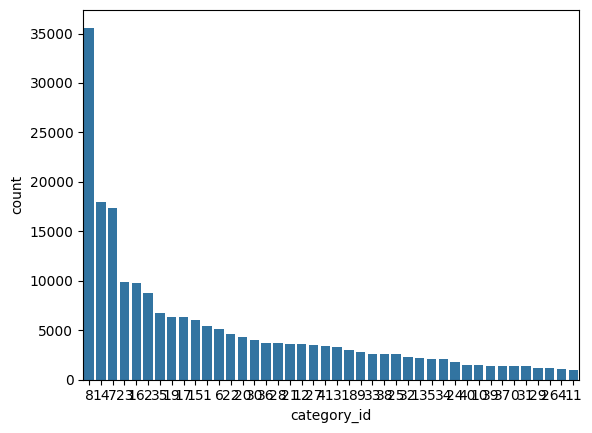

In [50]:
df_sorted = dataset['category_id'].value_counts().sort_values(ascending=False).index
sns.countplot(x='category_id', data=dataset, order=df_sorted)

We can see that the average class has about 5000 examples.

This dataset has a class imbalance problem.

In [51]:
category_size = dataset.groupby('category')['category_id'].count()
average_size = category_size.mean()
average_size


4988.738095238095

In [52]:
import numpy as np

sizes = dataset['category_id'].value_counts()
median_size = np.median(sizes)
print("Median Size:", median_size)


Median Size: 3362.5


In [53]:
dataset['merged'] = dataset[['headline', 'short_description']].astype(str).apply(lambda x: ' '.join(x), axis=1)


Now we'll drop everything aside merged, category and category ID

In [54]:
dataset = dataset[['merged', 'category', 'category_id']]


In [55]:
# Group the dataset by class and concatenate the examples within each group
concatenated_dataset = dataset.groupby('category')['merged'].apply(lambda x: ' '.join(x)).reset_index()

# Print the concatenated dataset
print(concatenated_dataset)


          category                                             merged
0             ARTS  An Alert, Well-Hydrated Artist in No Acute Dis...
1   ARTS & CULTURE  Modeling Agencies Enabled Sexual Predators For...
2     BLACK VOICES  Mariah Carey Brings Big, Big Energy To Latto's...
3         BUSINESS  REI Workers At Berkeley Store Vote To Unionize...
4          COLLEGE  Cornell Frat's 'Pig Roast' Gave Points For Sex...
5           COMEDY  23 Of The Funniest Tweets About Cats And Dogs ...
6            CRIME  Memphis Police: Arrest Made In Jogger's Disapp...
7   CULTURE & ARTS  How A New Documentary Captures The Complexity ...
8          DIVORCE  50 Empowering Songs To Help Get You Through A ...
9        EDUCATION  Cyberattack Prompts Los Angeles School Distric...
10   ENTERTAINMENT  Golden Globes Returning To NBC In January Afte...
11     ENVIRONMENT  First Public Global Database Of Fossil Fuels L...
12           FIFTY  Love, Facebook and Infidelity nan Boomers Were...
13    FOOD & DRINK  

In [56]:
print(concatenated_dataset.shape[0])


42


In [57]:
import re

concatenated_dataset['merged'] = concatenated_dataset['merged'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))


In [58]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Lemmatize and stem the words in the 'news_desc' column
concatenated_dataset.merged = concatenated_dataset.merged.apply(lambda x: ' '.join([lemmatizer.lemmatize(stemmer.stem(word)) for word in x.split()]))


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=8000, max_df=0.85, min_df=0.01, ngram_range=(1, 2))

# Fit and transform the text data to create the DTM
dtm = tfidf_vectorizer.fit_transform(concatenated_dataset['merged'])

# Convert the DTM to a DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the DTM DataFrame
print(dtm_df)


       aaron        ab     abbey      abbi       abc   abc new    aboard  \
0   0.012985  0.005667  0.005840  0.000000  0.000000  0.000000  0.000000   
1   0.005622  0.000000  0.000000  0.006754  0.005351  0.000000  0.000000   
2   0.006365  0.000000  0.000000  0.000000  0.026655  0.003913  0.000000   
3   0.000000  0.004149  0.001425  0.000000  0.008044  0.000000  0.000000   
4   0.004132  0.000000  0.000000  0.000000  0.003933  0.000000  0.000000   
5   0.000657  0.000860  0.000000  0.001579  0.001876  0.000000  0.000728   
6   0.003629  0.000000  0.000000  0.001453  0.008060  0.005578  0.004021   
7   0.006004  0.003930  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000569  0.000000  0.001607  0.000649  0.000000   
9   0.008144  0.000000  0.000000  0.000000  0.003876  0.000000  0.000000   
10  0.014689  0.003542  0.009387  0.004644  0.018394  0.002376  0.002141   
11  0.000000  0.002494  0.000000  0.000000  0.001813  0.002927  0.002110   
12  0.000000

The most similar class to FOOD & DRINK is TASTE
The most similar class to PARENTING is PARENTS
The most similar class to PARENTS is PARENTING
The most similar class to TASTE is FOOD & DRINK
The most similar class to THE WORLDPOST is WORLDPOST
The most similar class to WORLD NEWS is THE WORLDPOST
The most similar class to WORLDPOST is THE WORLDPOST


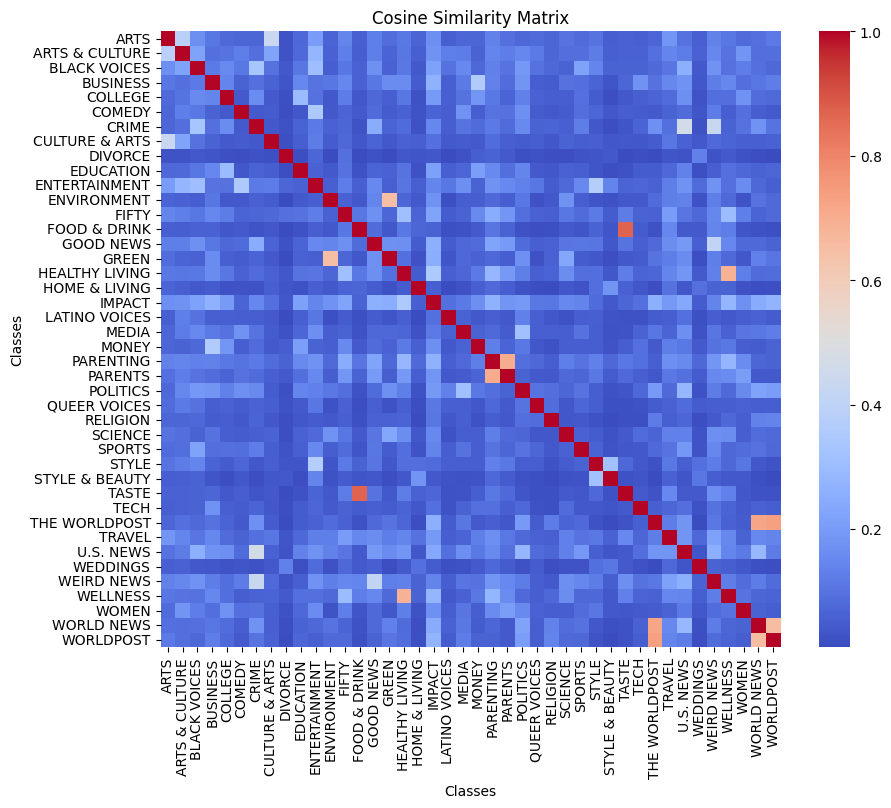

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(dtm_df)

# Find the most similar classes
most_similar_classes = []
for i in range(len(similarity_matrix)):
    # Find the index of the most similar class for each class
    most_similar_index = np.argsort(similarity_matrix[i])[::-1][1]
    
    # Get the class names for the current class and the most similar class
    current_class = concatenated_dataset['category'].unique()[i]
    similar_class = concatenated_dataset['category'].unique()[most_similar_index]
    
    # Check if the similarity is greater than 0.7
    if similarity_matrix[i][most_similar_index] > 0.7:
        # Print the most similar classes
        print(f"The most similar class to {current_class} is {similar_class}")

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=concatenated_dataset['category'].unique(), yticklabels=concatenated_dataset['category'].unique(), cmap='coolwarm')
plt.title('Cosine Similarity Matrix')
plt.xlabel('Classes')
plt.ylabel('Classes')
plt.show()

# # Print the most similar classes
# for current_class, similar_class in most_similar_classes:
#     print(f"The most similar class to {current_class} is {similar_class}")


Hence we can merge the similar classes together:

- Taste and food and drink
- The worldpost and worldpost
- Wellness and healthy living
- Parents and Parenting
- Environment and green


In [61]:
# Merge classes "taste" and "food and drink"
dataset.loc[dataset['category'].isin(['Taste', 'FOOD AND DRINK']), 'category'] = 'FOOD AND DRINK'
# Merge classes "the worldpost" and "worldpost"
dataset.loc[dataset['category'].isin(['THE WORLDPOST', 'WORLDPOST']), 'category'] = 'WORLDPOST'
# Merge classes "PARENTS" and "PARENTING"
dataset.loc[dataset['category'].isin(['PARENTS', 'PARENTING']), 'category'] = 'PARENTING'
# Merge classes "ENVIRONMENT" and "GREEN"
dataset.loc[dataset['category'].isin(['ENVIRONMENT', 'GREEN']), 'category'] = 'ENVIRONMENT'
# Merge classes "WELLNESS" and "HEALTHY LIVING"
dataset.loc[dataset['category'].isin(['WELLNESS', 'HEALTHY LIVING']), 'category'] = 'WELLNESS'

# Print the updated dataset
print(dataset)


                                                   merged   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

        category_id  
0                 0  
1                 0  
2                 1  
3                 2  
4                 0  
...

In [62]:
# Assigning a new category ID to each unique news category
category_id = {category: i for i, category in enumerate(dataset['category'].unique())}

# Mapping the new category ID to the dataset
dataset['category_id'] = dataset['category'].map(category_id)

# Print the updated dataset
print(dataset)


                                                   merged   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

        category_id  
0                 0  
1                 0  
2                 1  
3                 2  
4                 0  
...

In [63]:
print(dataset['category'].unique())


['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'ARTS & CULTURE' 'STYLE' 'TASTE' 'WORLDPOST'
 'GOOD NEWS' 'FIFTY' 'ARTS' 'DIVORCE']


In [64]:
unique_counts = dataset['category'].value_counts()
print(unique_counts)


category
POLITICS          35602
WELLNESS          24639
ENTERTAINMENT     17362
PARENTING         12746
TRAVEL             9900
STYLE & BEAUTY     9814
QUEER VOICES       6347
FOOD & DRINK       6340
WORLDPOST          6243
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
ENVIRONMENT        4066
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION          1014
Name: count, dtype: int64


In [65]:
num_classes = len(dataset['category'].unique())
print("Number of classes:", num_classes)


Number of classes: 38


<Axes: xlabel='category_id', ylabel='count'>

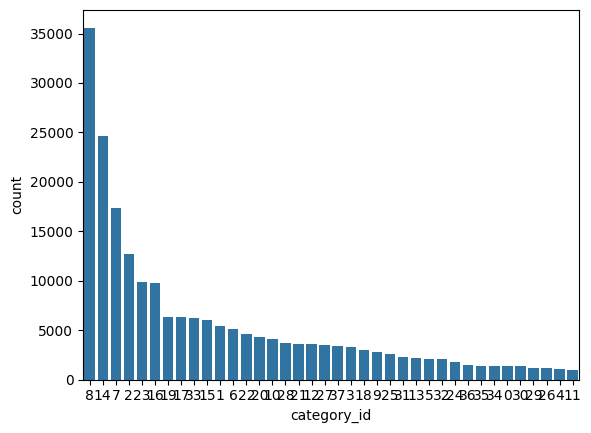

In [66]:
df_sorted = dataset['category_id'].value_counts().sort_values(ascending=False).index
sns.countplot(x='category_id', data=dataset, order=df_sorted)

In [67]:
average_examples_per_class = dataset['category'].value_counts().mean()
print("Average number of examples per class:", average_examples_per_class)


Average number of examples per class: 5513.868421052632


The average has gone up to 5500!

In [68]:
# Set the threshold for the maximum number of examples per class
threshold = 5500

# Filter the dataset to include only the classes with under 5500 examples
under5500 = dataset.groupby('category').filter(lambda x: len(x) < threshold)

# Get the unique classes with under 5500 examples
classes_under5500 = under5500['category'].unique()

# Print the classes with under 5500 examples
print("Classes with under 5500 examples:")
for class_name in classes_under5500:
    print(class_name)

# Print the number of total classes under 5500
num_classes_under5500 = len(classes_under5500)
print("Number of total classes under 5500:", num_classes_under5500)


Classes with under 5500 examples:
U.S. NEWS
COMEDY
WORLD NEWS
CULTURE & ARTS
TECH
SPORTS
WEIRD NEWS
ENVIRONMENT
EDUCATION
CRIME
SCIENCE
MEDIA
HOME & LIVING
WOMEN
BLACK VOICES
MONEY
RELIGION
LATINO VOICES
IMPACT
WEDDINGS
COLLEGE
ARTS & CULTURE
STYLE
TASTE
GOOD NEWS
FIFTY
ARTS
DIVORCE
Number of total classes under 5500: 28


Still more than half the classes are under 5500

We need to undersample the data above 5500 and ideally upsample the data below 5500

Ideally we would want to use LLMs for upsampling the data but due to time and machine resources being scarce, we will avoid that

For now we will just undersample the data and ignore the classes under a specific number of examples.

First we create a dataset that is above 5000 and downsample it

In [69]:
from sklearn.utils import resample

# Set the target number of samples
target_samples = 5500

# Initialize an empty DataFrame to store the undersampled data
undersampled_data = pd.DataFrame()

# Iterate over each unique category
for category_id in dataset['category_id'].unique():
    # Get the subset of data for the current category
    subset = dataset[dataset['category_id'] == category_id]
    
    # Check if the number of samples in the subset is greater than the target number of samples
    if len(subset) > target_samples:
        # Undersample the subset to the target number of sSTYLE & BEAUTYmples
        undersampled_subset = resample(subset, n_samples=target_samples, replace=False, random_state=42)
        
        # Append the undersampled subset to the undersampled data DataFrame
        undersampled_data = pd.concat([undersampled_data, undersampled_subset])
    else:
        # Append the subset to the undersampled data DataFrame without undersampling
        undersampled_data = pd.concat([undersampled_data, subset])

# Reset the index of the undersampled data DataFrame
undersampled_data.reset_index(drop=True, inplace=True)

# Print the undersampled data
print(undersampled_data)


                                                   merged   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
3       Cleaner Was Dead In Belk Bathroom For 4 Days B...  U.S. NEWS   
4       Reporter Gets Adorable Surprise From Her Boyfr...  U.S. NEWS   
...                                                   ...        ...   
129537  Local Mom Gives A "Hand Up" To Single Mothers ...    DIVORCE   
129538  Fathers Challenge Jail Sentences For Child Sup...    DIVORCE   
129539  Tips To Help Your Dog Deal With Divorce Breaki...    DIVORCE   
129540  Finding Love Again: Advice for the Divorced Wo...    DIVORCE   
129541  Five Unexpected Behaviors That Sink a Marriage...    DIVORCE   

        category_id  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'QUEER VOICES'),
  Text(1, 0, 'POLITICS'),
  Text(2, 0, 'ENTERTAINMENT'),
  Text(3, 0, 'WORLDPOST'),
  Text(4, 0, 'TRAVEL'),
  Text(5, 0, 'PARENTING'),
  Text(6, 0, 'WELLNESS'),
  Text(7, 0, 'BUSINESS'),
  Text(8, 0, 'STYLE & BEAUTY'),
  Text(9, 0, 'FOOD & DRINK'),
  Text(10, 0, 'COMEDY'),
  Text(11, 0, 'SPORTS'),
  Text(12, 0, 'BLACK VOICES'),
  Text(13, 0, 'HOME & LIVING'),
  Text(14, 0, 'ENVIRONMENT'),
  Text(15, 0, 'WEDDINGS'),
  Text(16, 0, 'WOMEN'),
  Text(17, 0, 'CRIME'),
  Text(18, 0, 'IMPACT'),
  Text(19, 0, 'DIVORCE'),
  Text(20, 0, 'WORLD NEWS'),
  Text(21, 0, 'MEDIA'),
  Text(22, 0, 'WEIRD NEWS'),
  Text(23, 0, 'RELIGION'),
  Text(24, 0, 'STYLE'),
  Text(25, 0, 'SCIENCE'),
  Text(26, 0, 'TECH'),
  Text(27, 0, 'TASTE'),
  Text(28, 0, 'MONEY'),
  T

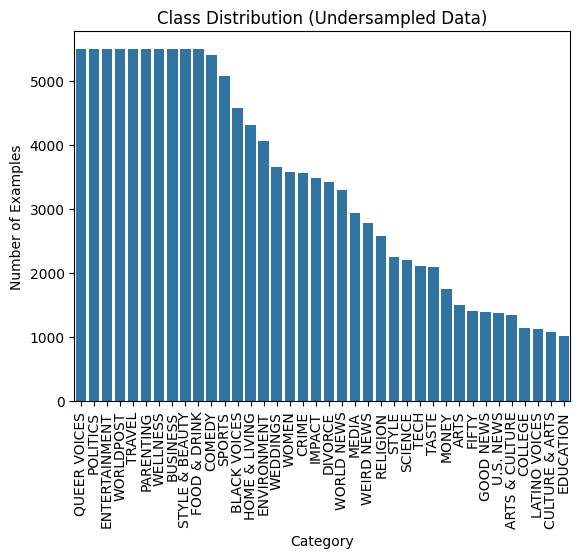

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the categories by count
sorted_categories = undersampled_data['category'].value_counts().sort_values(ascending=False).index

# Plot the class distribution in a sorted manner
sns.countplot(x='category', data=undersampled_data, order=sorted_categories)
plt.xlabel('Category')
plt.ylabel('Number of Examples')
plt.title('Class Distribution (Undersampled Data)')
plt.xticks(rotation=90)


In [71]:
print("Number of classes in undersampled data:", undersampled_data['category'].nunique())


Number of classes in undersampled data: 38


Now we'll find classes under 5500 examples and upsample them.

# Dropping everything except category ID and merged

In [72]:
truncated = pd.DataFrame({'news_desc': undersampled_data.merged,'category_id':undersampled_data.category_id})
truncated.head(10)

,news_desc,category_id
0,Over 4 Million Americans Roll Up Sleeves For O...,0
1,"American Airlines Flyer Charged, Banned For Li...",0
2,Woman Who Called Cops On Black Bird-Watcher Lo...,0
3,Cleaner Was Dead In Belk Bathroom For 4 Days B...,0
4,Reporter Gets Adorable Surprise From Her Boyfr...,0
5,Virginia Thomas Agrees To Interview With Jan. ...,0
6,One Dead After Plane Crashes At Reno Air Race ...,0
7,Family Of American Held In Afghanistan Says He...,0
8,Watchdog Report Finds Some Census Takers Who F...,0
9,Alabama Sidesteps Compensation For Survivor Of...,0


# Converting the dataset to lower case

In [73]:
truncated['news_desc'] = truncated['news_desc'].apply(lambda x: str(x).lower())
truncated.head(10)

,news_desc,category_id
0,over 4 million americans roll up sleeves for o...,0
1,"american airlines flyer charged, banned for li...",0
2,woman who called cops on black bird-watcher lo...,0
3,cleaner was dead in belk bathroom for 4 days b...,0
4,reporter gets adorable surprise from her boyfr...,0
5,virginia thomas agrees to interview with jan. ...,0
6,one dead after plane crashes at reno air race ...,0
7,family of american held in afghanistan says he...,0
8,watchdog report finds some census takers who f...,0
9,alabama sidesteps compensation for survivor of...,0


# Removing special characters from the dataset

In [74]:
truncated['news_desc'] = truncated['news_desc'].apply(lambda x: re.sub(r'[!@#$%^&*()_+=\-~`;:\'",.<>/?|\\]', '', x))
truncated.head(10)


,news_desc,category_id
0,over 4 million americans roll up sleeves for o...,0
1,american airlines flyer charged banned for lif...,0
2,woman who called cops on black birdwatcher los...,0
3,cleaner was dead in belk bathroom for 4 days b...,0
4,reporter gets adorable surprise from her boyfr...,0
5,virginia thomas agrees to interview with jan 6...,0
6,one dead after plane crashes at reno air race ...,0
7,family of american held in afghanistan says he...,0
8,watchdog report finds some census takers who f...,0
9,alabama sidesteps compensation for survivor of...,0


# Standardising the data format in the dataset

In [75]:
truncated['news_desc'] = truncated['news_desc'].apply(lambda x: re.sub(r'(\d{1,2})/(\d{1,2})/(\d{4})', r'\2-\1-\3', x))
truncated.head(10)

,news_desc,category_id
0,over 4 million americans roll up sleeves for o...,0
1,american airlines flyer charged banned for lif...,0
2,woman who called cops on black birdwatcher los...,0
3,cleaner was dead in belk bathroom for 4 days b...,0
4,reporter gets adorable surprise from her boyfr...,0
5,virginia thomas agrees to interview with jan 6...,0
6,one dead after plane crashes at reno air race ...,0
7,family of american held in afghanistan says he...,0
8,watchdog report finds some census takers who f...,0
9,alabama sidesteps compensation for survivor of...,0


# Expanding english word (Eg: can't -> cannot)

In [76]:
import contractions

truncated['news_desc'] = truncated['news_desc'].apply(lambda x: contractions.fix(x))
truncated.head(10)

,news_desc,category_id
0,over 4 million americans roll up sleeves for o...,0
1,american airlines flyer charged banned for lif...,0
2,woman who called cops on black birdwatcher los...,0
3,cleaner was dead in belk bathroom for 4 days b...,0
4,reporter gets adorable surprise from her boyfr...,0
5,virginia thomas agrees to interview with jan 6...,0
6,one dead after plane crashes at reno air race ...,0
7,family of american held in afghanistan says he...,0
8,watchdog report finds some census takers who f...,0
9,alabama sidesteps compensation for survivor of...,0


# Removing stop words

In [77]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
additional_stopwords = {'is', 'of', 'an'}

stop_words.update(additional_stopwords)
truncated['news_desc'] = truncated['news_desc'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
truncated.head(10)

[nltk_data] Downloading package stopwords to /home/snow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,news_desc,category_id
0,4 million americans roll sleeves omicrontarget...,0
1,american airlines flyer charged banned life pu...,0
2,woman called cops black birdwatcher loses laws...,0
3,cleaner dead belk bathroom 4 days body found p...,0
4,reporter gets adorable surprise boyfriend live...,0
5,virginia thomas agrees interview jan 6 panel c...,0
6,one dead plane crashes reno air race singleeng...,0
7,family american held afghanistan says freed ta...,0
8,watchdog report finds census takers fudged 202...,0
9,alabama sidesteps compensation survivor 63 kkk...,0


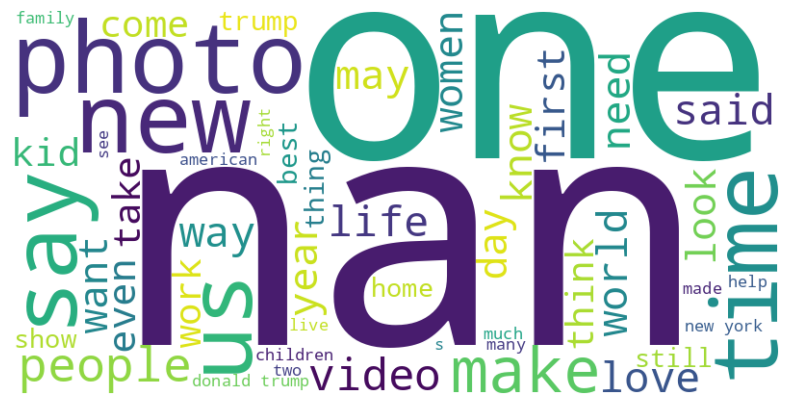

In [78]:
from wordcloud import WordCloud

# Combine all the text in the dataset
text = ' '.join(truncated['news_desc'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [79]:
truncated['news_desc'][0]

'4 million americans roll sleeves omicrontargeted covid boosters health experts said early predict whether demand would match 171 million doses new boosters us ordered fall'

In [80]:
truncated

,news_desc,category_id
0,4 million americans roll sleeves omicrontarget...,0
1,american airlines flyer charged banned life pu...,0
2,woman called cops black birdwatcher loses laws...,0
3,cleaner dead belk bathroom 4 days body found p...,0
4,reporter gets adorable surprise boyfriend live...,0
...,...,...
129537,local mom gives hand single mothers tricia war...,37
129538,fathers challenge jail sentences child support...,37
129539,tips help dog deal divorce breaking hard famil...,37
129540,finding love advice divorced woman legal freed...,37


# Normalizing data

Data normalization is important to reduce sparseness and remove faulty aspects of the data.

# Spell Correction

In [81]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary( dictionary_path,term_index=0, count_index=1)

True

In [82]:
def correct_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    return suggestions[0].term if suggestions else text

truncated['news_desc'] = truncated['news_desc'].apply(correct_spelling)

# Splitting joined words

# Removing Alphanumerics

Let's remove numbers/alphanumerics from the column because a lot of unwanted alphanumeric tokens populate the dataset. There will be some information loss, but they are not as useful to the machine as more clean, uniform data.

In [83]:
import re

truncated['news_desc'] = truncated['news_desc'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))


# Lemmatization and Stemming

In [84]:
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming and lemmatizing the words in the lemmatized_notes column
truncated['news_desc'] = truncated['news_desc'].apply(lambda x: ' '.join([lemmatizer.lemmatize(stemmer.stem(word)) for word in x.split()]))

stemmer = PorterStemmer()

# Stemming the words in the lemmatized_notes column
truncated['news_desc'] = truncated['news_desc'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [85]:
# Import the os module
import os

# Define the file path
file_path = os.path.join('data', 'preprocessed.csv')

# Save the preprocessed data as a CSV file
truncated.to_csv(file_path, index=False)
